In [1]:
from hybridq_clifford.extras.otoc import simulate
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
import numpy as np

random_unitary = unitary_group.rvs

In [2]:
# Set number of qubits and gates
n_qubits = 6
n_gates = 12

# Generate random circuit
circ_U = [(random_unitary(2**2),
           np.random.choice(n_qubits, size=2, replace=False))
          for _ in range(n_gates)]

# Generate random initial state
initial_state = ''.join(np.random.choice(list('01+-'), size=n_qubits))

# Generate random butterfly
butterfly = ''.join(np.random.choice(list('IXYZ'), size=n_qubits))

# Get random position for target
target_position = np.random.choice(n_qubits)

# Get OTOC value
info, otoc_value = simulate(circ_U=circ_U,
                            butterfly=butterfly,
                            initial_state=initial_state,
                            target_position=target_position,
                            parallel=True,
                            verbose=True,
                            norm_atol=1e-6)

Compress:   0%|          | 0/12 [00:00<?, ?it/s]

Decomposing:   0%|          | 0/3 [00:00<?, ?it/s]

NT=8, EB=15,361, RB=129,127,208,515,966,861,305, CB=3,774,335 (BT=70.512μs, ET=0:00:01, LV=9.4%, FM=66.71%, UM=0.23GB)                                


In [3]:
# Print simulation info
for k_, v_ in info.items():
    print(f'# {k_}: {v_}')

# n_explored_branches: 15361
# n_completed_branches: 3774335
# n_remaining_branches: 18446744073709551609
# n_total_branches: 64
# n_threads: 8
# runtime_ms: 1061
# branching_time_ms: 101
# expanding_time_ms: 960
# mem_peak_gb: 0.23418045043945312
# n_branches/us: 0.01447785108388313


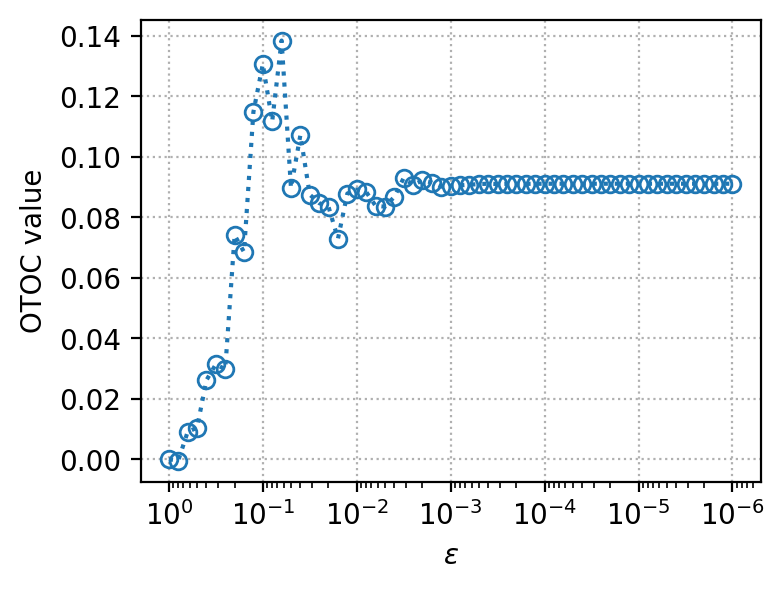

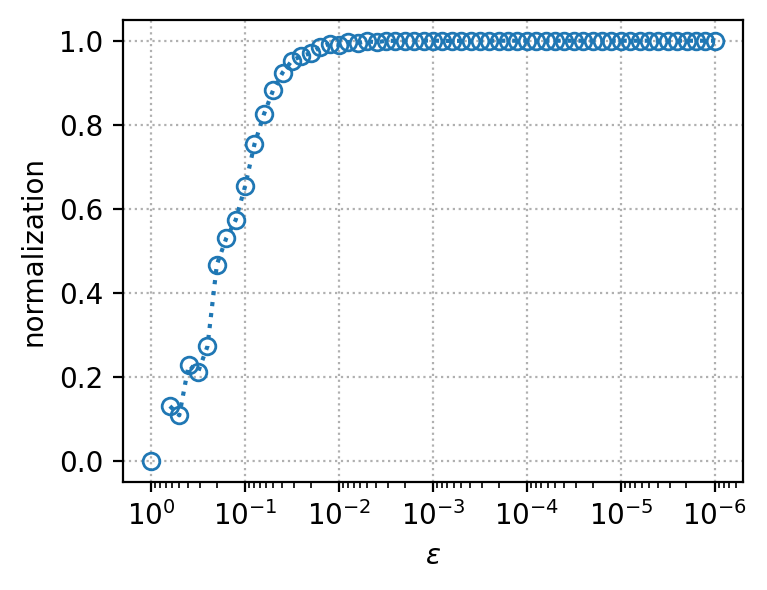

In [4]:
plt.figure(figsize=(4, 3), dpi=200, facecolor='#00000000')
plt.plot(10**np.array(otoc_value.log10_norm_atols),
         otoc_value.otoc_values,
         'o:',
         mfc='none')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.grid(ls=':')
plt.xlabel('$\epsilon$')
plt.ylabel('OTOC value')
plt.show()

plt.figure(figsize=(4, 3), dpi=200, facecolor='#00000000')
plt.plot(10**np.array(otoc_value.log10_norm_atols),
         otoc_value.otoc_norms0,
         'o:',
         mfc='none')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.grid(ls=':')
plt.xlabel('$\epsilon$')
plt.ylabel('normalization')
plt.show()